In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from itertools import repeat
import math as mt
import pandas as pd

pi = np.pi

In [82]:
# def rounding(value):
#     answer = mt.floor(value) + mt.ceil(value)
#     return answer / 2

# def Uniform_quantizater(input, level):
#     step_size = 2 * max(input) / (level-1)
#     Quantized_signal = [rounding(i / step_size) * step_size for i in input]
#     return Quantized_signal

# def Tabular(Signal): 
#     solution = pd.DataFrame({'Levels':Signal})
#     solution = solution.drop_duplicates().reset_index(drop=True)
#     solution = solution.drop(0)
#     return solution

# def Binary(level,bits):
#     X8 = []
#     for i in range(level):
#         num = bin(i).lstrip('0b').zfill(bits) 
#         arr1 = []
#         arr1 = [int(j) for j in num]   
#         X8.append(arr1)
#     return X8

In [83]:
def delta_dm(A, fm, fs, pi):
    return 2 * A * fm * pi / fs

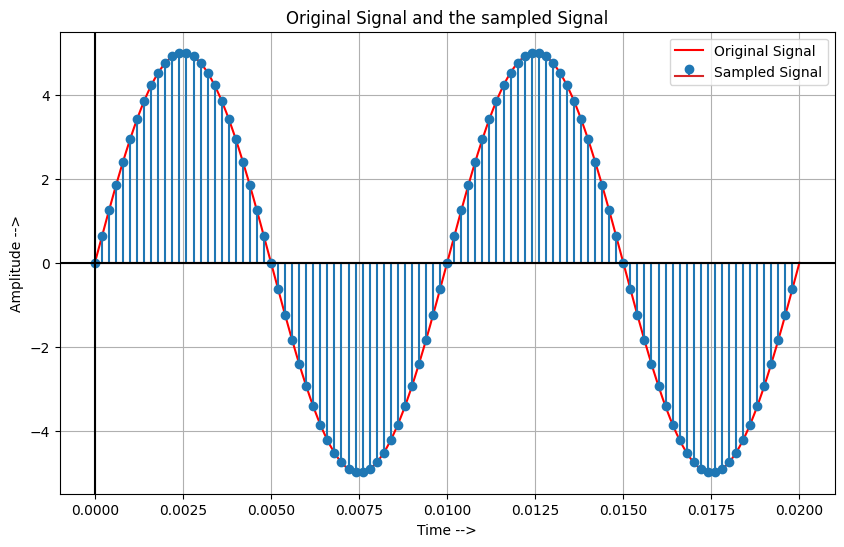

In [84]:
A = 5 #Amplitude for input signal
fm = 100 #Message Frequency
M = 50   #Nyquist Constant
fs = M * fm  #Sampling Frequency
ts = 1 / fs  #Sampling Period
cycles = 2   #Number of cycles
t_org = np.linspace(0, M * cycles * ts, 100000)   #Points for original signal
t_sam = np.arange(0, M * cycles * ts, ts)         #Points for sampled signal
x_org = A * np.sin(2 * pi * fm * t_org)           #Original signal
x_sam = A * np.sin(2 * pi * fm * t_sam)           #Sampled Signal

plt.figure(figsize=(10,6))
plt.plot(t_org, x_org, color = 'red')
plt.stem(t_sam,x_sam)
plt.title('Original Signal and the sampled Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.legend(['Original Signal', 'Sampled Signal'], loc = 'upper right')
plt.grid(True)
plt.axhline( y = 0, color = 'black')
plt.axvline( x = 0, color = 'black')
plt.show()

In [85]:
delta = delta_dm(A,fm,fs,pi)
# delta = 0.4
print(delta)

0.6283185307179586


In [86]:
len_org = (len(t_org))
len_sam = len(t_sam)

In [87]:
length = int(len_org / len_sam) #length fow which we will have to run the repetition list

In [88]:
value = x_sam[0]  #Temp variable 
Dm_list = []

for i in range(0,len_sam):
    if i == 0:
        Dm_list.extend(repeat(value,length))
        value += delta
    else:
        error = x_sam[i] - x_sam[i - 1]
        if delta <= abs(value):
            if (error > 0):
                Dm_list.extend(repeat(value,length))
                if (error < delta):
                    pass
                if (value <= A ):
                    value = value + delta
                
            else:
                Dm_list.extend(repeat(value,length))
                if (error < delta):
                    pass
                if (value >= -(A) ):
                    value = value - delta
        else:
            Dm_list.extend(repeat(value,length))
            if (x_sam[i - 1] > 0):
                value = value - delta
            if (x_sam[i - 1] < 0):
                value = value + delta
            
print(len(Dm_list))

100000


In [89]:
print((Dm_list))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [90]:
x_sam

array([ 0.00000000e+00,  6.26666168e-01,  1.24344944e+00,  1.84062276e+00,
        2.40876837e+00,  2.93892626e+00,  3.42273553e+00,  3.85256621e+00,
        4.22163963e+00,  4.52413526e+00,  4.75528258e+00,  4.91143625e+00,
        4.99013364e+00,  4.99013364e+00,  4.91143625e+00,  4.75528258e+00,
        4.52413526e+00,  4.22163963e+00,  3.85256621e+00,  3.42273553e+00,
        2.93892626e+00,  2.40876837e+00,  1.84062276e+00,  1.24344944e+00,
        6.26666168e-01,  6.12323400e-16, -6.26666168e-01, -1.24344944e+00,
       -1.84062276e+00, -2.40876837e+00, -2.93892626e+00, -3.42273553e+00,
       -3.85256621e+00, -4.22163963e+00, -4.52413526e+00, -4.75528258e+00,
       -4.91143625e+00, -4.99013364e+00, -4.99013364e+00, -4.91143625e+00,
       -4.75528258e+00, -4.52413526e+00, -4.22163963e+00, -3.85256621e+00,
       -3.42273553e+00, -2.93892626e+00, -2.40876837e+00, -1.84062276e+00,
       -1.24344944e+00, -6.26666168e-01, -1.22464680e-15,  6.26666168e-01,
        1.24344944e+00,  

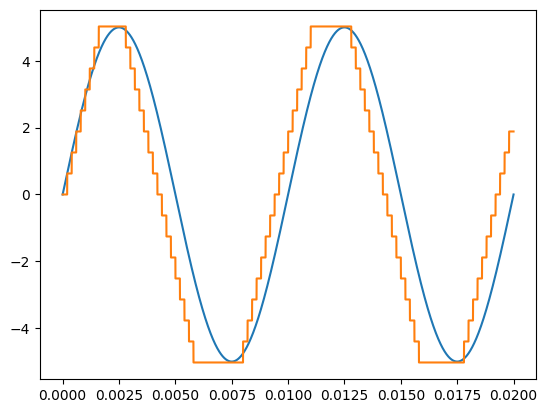

In [91]:
plt.plot(t_org, x_org)
plt.plot(t_org, Dm_list)